In [46]:
%matplotlib inline

import pandas as pd

# these will be useful later
import numpy  as np
from matplotlib import pyplot as plt

In [47]:
crime=pd.read_csv("mun.csv", index_col = "id", parse_dates = ["id"], encoding='iso-8859-1')
crime=crime.drop('SUBTIPO', axis=1)


In [48]:
hom14= crime[(crime['MODALIDAD']=='HOMICIDIOS') & (crime['TIPO'] == 'DOLOSOS' )]
hom14= hom14.groupby([hom14.index,'year','ENTIDAD', 'MUNICIPIO']).sum().reset_index()
hom14=hom14.set_index(['id'])
hom14=hom14[hom14.year == 2014]
hom14=hom14.rename(columns = {'total':'homicidios'})


In [49]:
pop=pd.read_csv("pop.csv", index_col = "id", parse_dates = ["id"], encoding='iso-8859-1')
pop=pop.drop('hom', axis=1)
pop=pop.drop('muj', axis=1)


In [50]:
tot14 = pd.concat([hom14, pop], axis=1)
tot14= tot14.drop('nom', axis=1)
tot14['hom_rate'] = (tot14['homicidios']/tot14['pop'])*100000


In [51]:
x31_14 = pd.read_csv("3x1_2014utf8.csv", index_col = "id", parse_dates = ["id"])
x31_14 = x31_14.drop('ClaveEntidad', axis=1)
x31_14 = x31_14.drop('ClaveMunicipio', axis=1)
x31_14 = x31_14.drop('ClaveLocalidad', axis=1)
x31_14 = x31_14.drop('NombreLocalidad', axis=1)
x31_14 = x31_14.drop('ID_LOC', axis=1)
x31_14 = x31_14.groupby([x31_14.index,'year']).sum()
x31_14 = x31_14.rename(columns = {'serviciosComunitarios':'Servicios Comunitarios'})
x31_14 = x31_14.rename(columns = {'infraestructura':'Infraestructura'})
x31_14 = x31_14.rename(columns = {'proyectosProductivos':'Proyectos Productivos'})


In [52]:
tot14 = tot14.join(x31_14)
tot14.head()

,,year,ENTIDAD,MUNICIPIO,homicidios,pop,hom_rate,Servicios Comunitarios,Infraestructura,Proyectos Productivos,suma
id,year,,,,,,,,,,
1001,2014,2014.0,AGUASCALIENTES,AGUASCALIENTES,31.0,797010.0,3.889537,1,4,1,6
1002,2014,2014.0,AGUASCALIENTES,ASIENTOS,0.0,45492.0,0.000000,2,6,1,9
1003,2014,2014.0,AGUASCALIENTES,CALVILLO,2.0,54136.0,3.694399,3,2,5,10
1004,2014,2014.0,AGUASCALIENTES,COSIO,0.0,15042.0,0.000000,2,3,0,5
1005,2014,2014.0,AGUASCALIENTES,JESUS MARIA,6.0,99590.0,6.024701,0,0,2,2


In [53]:
tot14 = tot14.rename(columns = {'suma':'Total 3x1'})
tot14=tot14.drop('homicidios',axis=1)
tot14=tot14.drop('pop',axis=1)
tot14=tot14.drop('year',axis=1)



In [54]:
tot14=tot14.reset_index()
tot14=tot14.set_index(['id'])

In [55]:
tot14.head(10)

,year,ENTIDAD,MUNICIPIO,hom_rate,Servicios Comunitarios,Infraestructura,Proyectos Productivos,Total 3x1
id,,,,,,,,
1001,2014,AGUASCALIENTES,AGUASCALIENTES,3.889537,1,4,1,6
1002,2014,AGUASCALIENTES,ASIENTOS,0.000000,2,6,1,9
1003,2014,AGUASCALIENTES,CALVILLO,3.694399,3,2,5,10
1004,2014,AGUASCALIENTES,COSIO,0.000000,2,3,0,5
1005,2014,AGUASCALIENTES,JESUS MARIA,6.024701,0,0,2,2
1006,2014,AGUASCALIENTES,PABELLON DE ARTEAGA,0.000000,1,0,0,1
1007,2014,AGUASCALIENTES,RINCON DE ROMOS,2.034340,1,2,0,3
1008,2014,AGUASCALIENTES,SAN JOSE DE GRACIA,0.000000,1,2,0,3
1009,2014,AGUASCALIENTES,TEPEZALA,0.000000,2,1,1,4


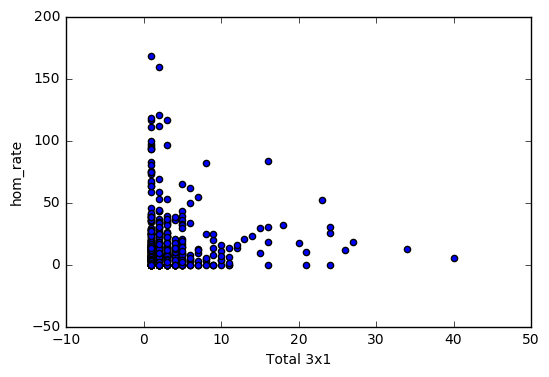

In [56]:
tot14.plot(kind = "scatter", x = "Total 3x1", y = "hom_rate")

In [57]:
tot14.to_csv('hom_3x1_14pan.csv')